# Linear Regression

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use('seaborn')

## Direct vs. Inverse Variation

The equation 

$$y=kx $$

represents a relationship between variables $x$ and $y$. The nature of this relationship depends on the value of constant $k$:

- If $k > 0$, the relationship between $x$ and $y$ is direct variation. In this case, as the value of $x$ increases, the value of $y$ also increases, maintaining a consistent ratio between them.

- If $k < 0$, the relationship between $x$ and $y$ is inverse variation. Here, as $x$ increases, $y$ decreases, and vice versa, while their product remains constant.

Moreover, the coefficient $k$ serves as an indicator of the extent to which changes in the independent variable $x$ impact the dependent variable $y$.

In [3]:
x = np.arange(-10, 10)
x

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9])

In [4]:
K = np.linspace(-3, 3, 6)
K

array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ])

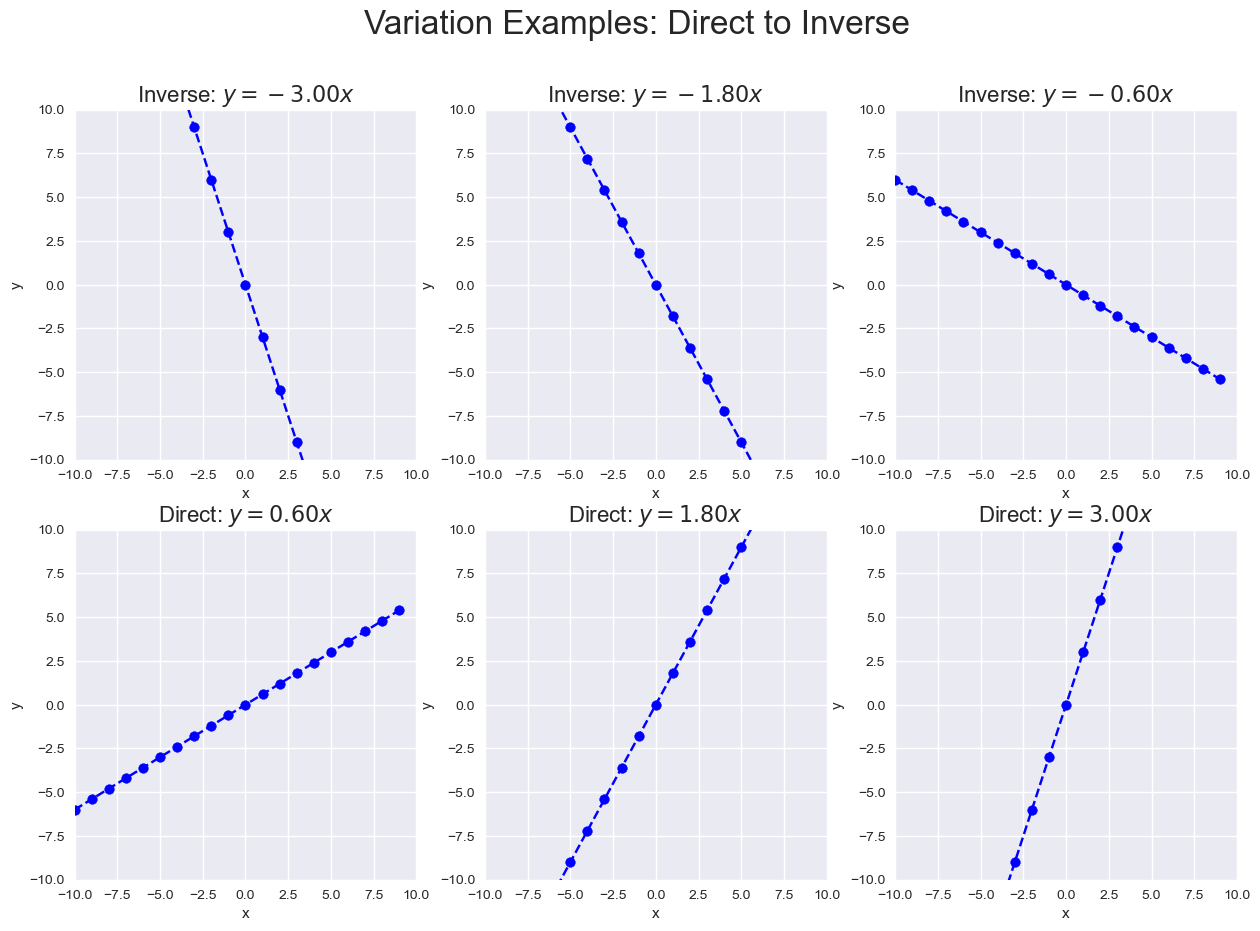

In [5]:
# Set up the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Variation Examples: Direct to Inverse', fontsize=24)

for i, k in enumerate(K):
    row = 0 if i<3 else 1
    col = i%3
    y = k*x
    name_type = "Direct" if k>0 else "Inverse"
    # Plot 1: Direct Variation
    axes[row, col].plot(x, y, color='blue', linestyle='dashed')
    axes[row, col].scatter(x, y, color='blue')
    axes[row, col].set_title(f'{name_type}: $y={k:.2f} x$', fontsize=16)
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel('y')
    axes[row, col].set_xlim(-10, 10)
    axes[row, col].set_ylim(-10, 10)
plt.savefig('variation.png')

Also, we can change the rotation point by add some term called a intercept to the equation:
$$y = kx + b$$

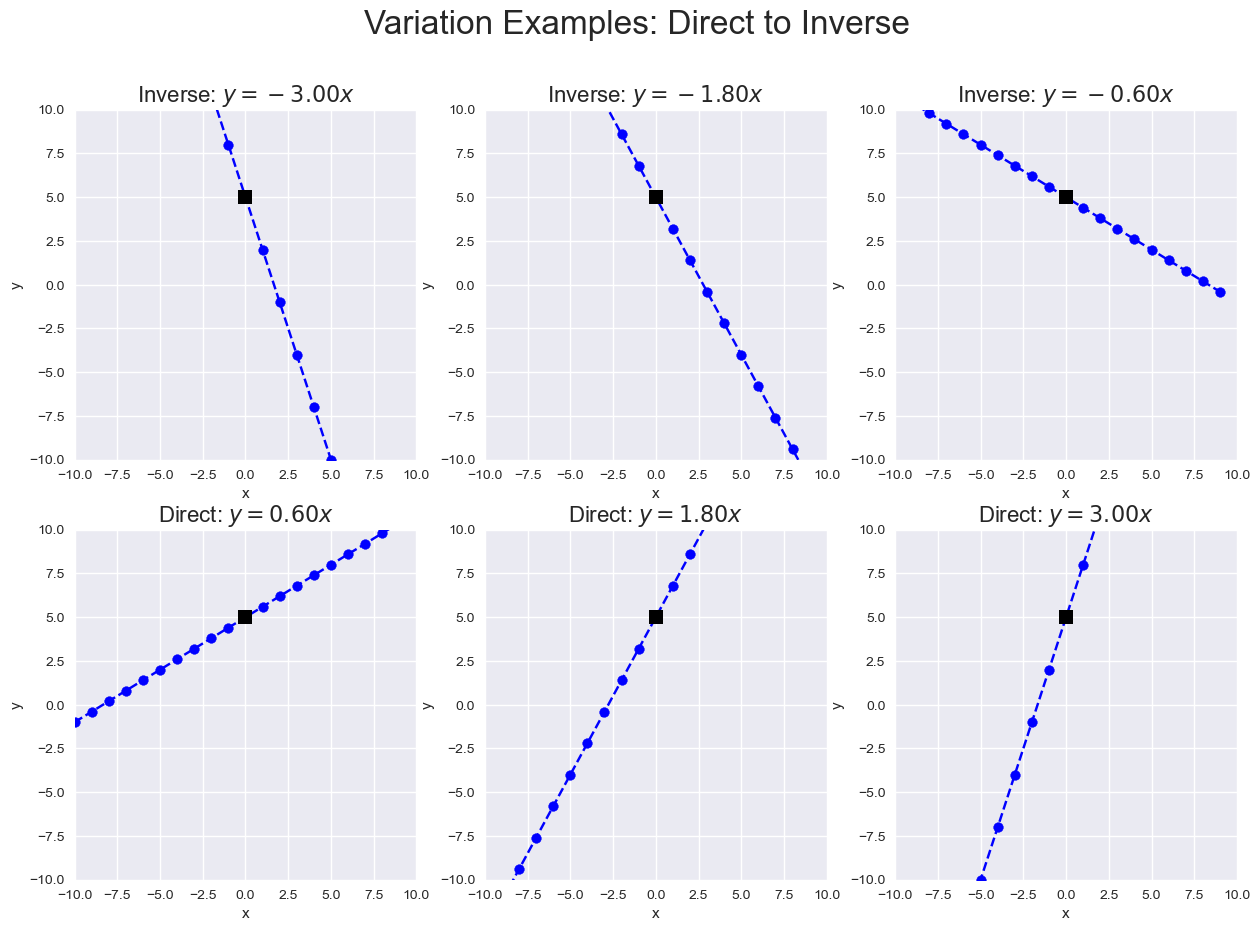

In [6]:
# Set up the subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Variation Examples: Direct to Inverse', fontsize=24)

b = 5
for i, k in enumerate(K):
    row = 0 if i<3 else 1
    col = i%3
    y = k*x + b
    name_type = "Direct" if k>0 else "Inverse"
    # Plot 1: Direct Variation
    axes[row, col].plot(x, y, color='blue', linestyle='dashed')
    axes[row, col].plot(0, 5, 'ks', markersize=10)
    axes[row, col].scatter(x, y, color='blue')
    axes[row, col].set_title(f'{name_type}: $y={k:.2f} x$', fontsize=16)
    axes[row, col].set_xlabel('x')
    axes[row, col].set_ylabel('y')
    axes[row, col].set_xlim(-10, 10)
    axes[row, col].set_ylim(-10, 10)
plt.savefig('variation2.png')

## Independent and Dependent variable
In the preceding section, the variable $x$ is denoted as an independent variable, while $y$ is considered a dependent variable. This implies that the value of $y$ is contingent upon the value of $x$. However, in real-world scenarios, the dependent variable, $y$, might be influenced by a set of independent variables $(x_1, x_2, \ldots, x_n)$.

It's important to note that independent variables are expected to have no interactions among themselves. In other words, their values are assumed to be distinct and unrelated when considering their impact on the dependent variable $y$.

---

## Linear Equation

Here's the expanded form of the equation $y = kx+b$ in a more generalized format:
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 +\cdots + \beta_nx_n$$

In this expanded equation:
- $y$ represents the dependent variable.
- $x_1, x_2, \ldots, x_n$ are independent variables that may influence $y$.
- $\beta_0$ is the intercept, representing the value of $y$ when all $x$ variables are zero.
- $\beta_1, \beta_2,\ldots, \beta_n$ are the coefficients that quantify the effect of each corresponding $x$ variable on $y$.

Each coefficient $\beta_i$ represents the change in the dependent variable $y$ for a one-unit change in the respective independent variable $x_i$, while holding all other variables constant. In essence, the coefficient $\beta_i$ quantifies the impact of the $i$th independent variable on the dependent variable.

## Process of Model Fitting
0. We will generate synthetic data for this experiment.
$$\text{Feature data} = X =\begin{bmatrix}x_{11}&x_{12}&\cdots&x_{1n}\\
                                          x_{21}&x_{22}&\cdots&x_{2n}\\
                                          \vdots&\vdots&\ddots&\vdots\\
                                          x_{m1}&x_{m2}&\cdots&x_{mn}
                            \end{bmatrix}$$
                            
$$\text{label} = y = \begin{bmatrix}y_1\\y_2\\\vdots\\y_m\end{bmatrix}$$
1. Formulate the underlying equations of the model.
$$\begin{align}
y_1 &= \beta_0 + \beta_1x_{11} + \beta_2x_{12} +\cdots + \beta_nx_{1n}\\
y_2 &= \beta_0 + \beta_1x_{21} + \beta_2x_{22} +\cdots + \beta_nx_{2n}\\
&\vdots\\
y_m &= \beta_0 + \beta_1x_{m1} + \beta_2x_{m2} +\cdots + \beta_nx_{mn}\\
\end{align}$$
where $m$ is number of rows or samples.
2. Align the available data with the model equations.
$$
\begin{bmatrix}
1&x_{11}&x_{12}&\cdots&x_{1n}\\
1&x_{21}&x_{22}&\cdots&x_{2n}\\
\vdots&\vdots&\vdots&\ddots&\vdots\\
1&x_{m1}&x_{m2}&\cdots&x_{mn}
\end{bmatrix}
\begin{bmatrix}
\beta_0\\
\beta_1\\
\beta_2\\
\vdots\\
\beta_n
\end{bmatrix}=
\begin{bmatrix}y_1\\y_2\\\vdots\\y_m\end{bmatrix}\to X\beta = y
$$
3. Transform the equations into a matrix-vector format.
$$X\beta = y$$
4. Fine-tune the model parameters for optimization.  
Let $(X^\top X)^{-1}X^\top$ be left inverse:
$$
\begin{align}
X\beta &= y\\
(X^\top X)^{-1}X^\top X\beta &= (X^\top X)^{-1}X^\top y\\
\beta &= (X^\top X)^{-1}X^\top y
\end{align}
$$
5. Perform statistical assessment of the model's validity.

In [7]:
from sklearn.datasets import make_regression

In [8]:
## step 0: generate synthetic data for this experiment.
# Generate a synthetic linear dataset
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)

In [9]:
X.shape, y.shape

((100, 10), (100,))

In [10]:
## step 1-2: create randomly beta and show the X*beta
beta = np.random.rand(10)
X[0, :], beta

(array([-0.92693047, -1.43014138,  1.6324113 , -3.24126734, -1.24778318,
        -1.02438764,  0.13074058, -0.05952536, -0.25256815, -0.44004449]),
 array([0.58804521, 0.54321055, 0.85816398, 0.68234591, 0.14079183,
        0.32435021, 0.99840619, 0.00965534, 0.22811398, 0.77437531]))

In [11]:
X[0, :] * beta

array([-5.45077028e-01, -7.76867884e-01,  1.40087659e+00, -2.21166552e+00,
       -1.75677678e-01, -3.32260349e-01,  1.30532202e-01, -5.74737299e-04,
       -5.76143254e-02, -3.40759586e-01])

In [12]:
## step 3:
y_pred = X @ beta
y_pred

array([-2.90908832e+00,  4.49271009e+00,  1.04484677e+00, -3.20063451e+00,
       -2.84581890e+00, -2.18958003e+00, -1.04003501e+00,  9.85969059e-01,
        2.12025376e+00, -1.53972568e+00, -3.06877029e+00, -9.32255472e-02,
       -4.01679849e+00, -6.48703840e-01,  1.31976743e+00, -1.49169983e+00,
        1.72816605e+00,  1.57888109e-01, -2.14955767e-01, -2.84584532e+00,
        1.54821739e+00, -1.20492302e+00, -4.43040302e-01,  1.24948499e+00,
        2.59545623e+00, -1.63765537e-01,  3.77134181e+00, -3.32990018e+00,
       -2.19539310e+00, -1.97668672e-02, -3.71756412e-01,  6.81127625e-01,
       -7.98897583e-01, -1.79934129e+00,  5.81683233e+00,  8.82082928e-01,
       -9.30882107e-01, -1.32735220e+00,  3.29586646e-01,  2.05604257e+00,
       -5.16044135e-01,  9.28259546e-01,  1.79515555e-01,  6.74807345e-01,
        3.01829156e+00,  3.72171701e-01,  6.32021180e-01, -3.62486424e+00,
        4.01886207e-01, -9.64418015e-01,  8.13593573e-02,  3.44058456e+00,
        9.91603820e-01, -

In [13]:
optimized_beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [14]:
y_pred = X @ optimized_beta
y_pred

array([-503.48406579,  412.90164459,  230.35920524, -203.36348381,
       -180.93196401, -126.29443072, -189.86834613,   66.25838184,
         29.03919286, -101.06557688, -249.60321879,  -47.48933631,
       -362.27649702, -198.59319901,  -78.93112197, -144.51364814,
        179.44708213,  152.69977709,  160.24356201, -279.18290582,
        119.06167969, -113.40534523, -100.84073509, -112.80006042,
        366.62739175,  -95.68025966,  378.05559084, -165.81381595,
       -179.66411086,  -47.60787449, -126.47224001,  248.54582343,
        -57.17604706,  -13.644214  ,  457.53521149,    3.22049036,
         -8.74491358,   41.64295971,  -57.5801899 ,  257.50219642,
        -65.99126283,    3.71035975,   20.39945902, -145.38555119,
        367.97231154,  161.97452997,  180.15095213, -353.54095598,
         13.23962763,  -93.18878795,   42.26762601,  199.36906982,
        145.91416951, -364.79407358,  -41.97939446,  -60.37198732,
        129.64403479,  262.19113437,   73.60561169,   34.06066

$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$


In [15]:
r_square = 1 - np.sum((y-y_pred)**2) / np.sum((y-np.mean(y))**2)
r_square

0.9974033577759127